In [1]:
#MODULES NEEDED FOR THIS PROJECT : 
# SKLEARN, NUMPY, PANDAS, NLTK  - WORDNET & STOPWORDS & VADER_LEXICON, SEABORN , SCIPY

import pandas as p
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.stats import spearmanr
import matplotlib.style as style
style.use('ggplot')

import string
import re  
import nltk  
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer  
from nltk import word_tokenize

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('stopwords') 
nltk.download('wordnet')



directory = r'C:\Users\Alankrit\3D Objects'    # SET DIRECTORY FOR THE DATA FILE AND CHANGE ACCORDINGLY

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Alankrit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alankrit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alankrit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
d = p.read_csv(os.path.join(directory,'BeerDataScienceProject.csv'),engine='python')

# BASIC EXPLORATORY DATA ANALYSIS

In [3]:
df = d.copy()  #Creating a Duplicate Dataframe

print("\033[1mPrinting Null Values Distribution in each column\n\n\033[0m\n",d.isnull().sum())

#DROPPING THE REVIEWS WITH NO REVIEW PROFILE NAME
print("\n\n\033[1mDROPPING THE REVIEWS WITH NO REVIEW PROFILE NAME...\n\n")
df.dropna(subset=['review_profileName'],inplace=True)
df.reset_index(drop=True,inplace=True)

print("\nVisualizing Null Rows in each Column Again\033[0m\n\n",df.isnull().sum())

print("\n\nNO OF NULL ROWS REMOVED: ",len(d)-len(df))

Printing Null Values Distribution in each column


 beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64


DROPPING THE REVIEWS WITH NO REVIEW PROFILE NAME...



Visualizing Null Rows in each Column Again

 beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName        0
review_aroma              0
review_text             119
review_time               0
dtype: int64


NO OF NULL ROWS REMOVED:  115


In [4]:
print("\nNo. of Non-Numeric Columns are:",df.shape[1]-df.describe().shape[1])
print('\nNon Numeric Columns:\n',df.loc[:, df.dtypes == 'object'].columns.tolist())
print("\n\n")
df.describe()


No. of Non-Numeric Columns are: 4

Non Numeric Columns:
 ['beer_name', 'beer_style', 'review_profileName', 'review_text']





,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508475.000000,528755.000000,528755.000000,528755.000000,528755.000000,528755.000000,528755.000000,528755.000000,5.287550e+05
mean,7.017467,22100.514492,2598.714242,3.864529,3.758966,3.833230,3.766032,3.817386,1.224894e+09
std,2.204484,22159.343594,5282.239904,0.603996,0.685288,0.709937,0.668975,0.718846,7.605686e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174620e+09
50%,6.500000,14378.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240371e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288564e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


In [5]:
# DELETING DUPLICATE REVIEWS FROM SAME USER ON SAME BEER

df = df.sort_values('review_overall', ascending=False)   # to keep higher rating in case of duplicacy for the sake of beers
l1 = len(df)
df = df.drop_duplicates(subset= ['review_profileName','beer_beerId'], keep='first')

print(l1-len(df),"DUPLICATE REVIEWS REMOVED\n\n")
del l1

df.reset_index(drop=True,inplace=True)

4772 DUPLICATE REVIEWS REMOVED




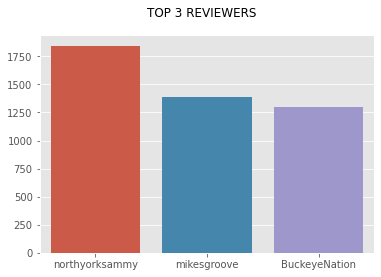

In [6]:
xx = df.review_profileName.value_counts()
sns.barplot(x=np.array(xx.index[:3]),y=np.array(xx.values[:3]))
plt.suptitle("TOP 3 REVIEWERS")
plt.figsize=(10,10)
plt.show()

# REVIEWS DISTRIBUTION ANALYSIS

Plotting Distributions for Preliminary Correlation Analysis



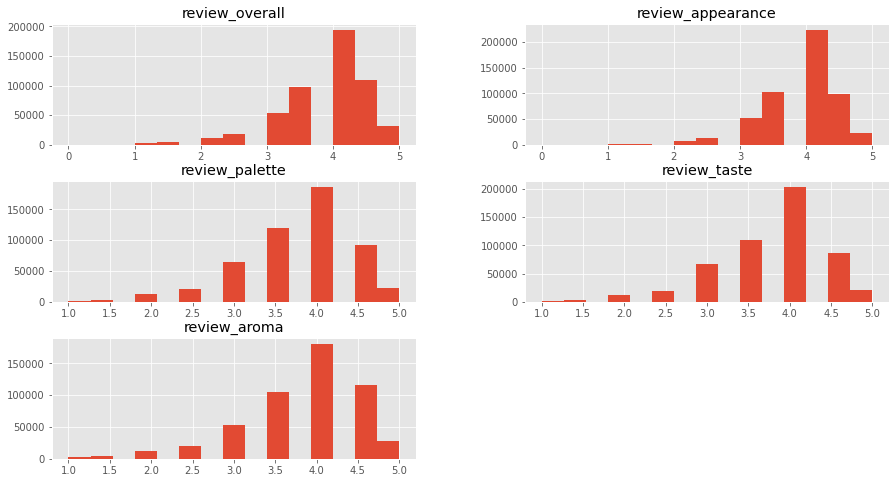

In [7]:
#Plotting Distribution of the Features Involved

print("\033[1mPlotting Distributions for Preliminary Correlation Analysis\033[0m\n")
df_reviews= df[['review_overall','review_appearance','review_palette','review_taste','review_aroma']]

df_reviews.hist(figsize=(15,8),bins=15)
plt.show()

In [8]:
print("\nIt is evident that all the reviews have maximum reviews as 4 STARS\n")
print("\nTo further Quantify this claim we shall iterate through all the reviews columns to find the most frequent starred review\n\n")

for i in df_reviews.columns:
    print(i,'\t',df_reviews[i].value_counts().index[0],'\t',df_reviews[i].value_counts().values[0],'\n')


It is evident that all the reviews have maximum reviews as 4 STARS


To further Quantify this claim we shall iterate through all the reviews columns to find the most frequent starred review


review_overall 	 4.0 	 194620 

review_appearance 	 4.0 	 224033 

review_palette 	 4.0 	 186787 

review_taste 	 4.0 	 204005 

review_aroma 	 4.0 	 180689 



# FUNCTION TO EXTRACT YEARS FROM TIMESTAMP

In [9]:
def timestamp_to_year(timestamp):
    return datetime.datetime.fromtimestamp (int(timestamp)).strftime('%Y')

df['year_of_review'] = list(map(timestamp_to_year,df['review_time']))
df.year_of_review[2:5]  #verification of conversion of timestamp to year


df.drop(columns=['review_time'],inplace=True)  # Dropping the Review Time column to save unnecessary computational time
df.reset_index(drop=True,inplace=True)

# SOLUTION FOR Q1: FINDING TOP 3 BREWERIES WITH THE STRONGEST BEERS ALONG WITH BEER NAMES AND BEER ABV CONTENT

In [10]:
df = df.sort_values(by=['beer_ABV'],ascending=False)  #SORTING THE DATAFRAME BASED ON ALCOHOL BY VOLUME (ABV) CONTENT

#Keeping the TOP 3 Strongest Beers with Unique Vendors
solution_1 = df.drop_duplicates(subset=['beer_brewerId'], keep="first", inplace=False).iloc[:3,:3].to_string(index=False)

print("\033[1mSOLUTION 1:\n")   
print("\n\033[0mTOP 3 Brewers with the Strongest Beers:\n\n",solution_1)  # Printing solution for QUESTION 1
df.reset_index(drop=True,inplace=True)

SOLUTION 1:


TOP 3 Brewers with the Strongest Beers:

  beer_ABV  beer_beerId  beer_brewerId
     57.7        73368           6513
     27.0        25759             35
     19.5        58656           2958


# REVIEWS ANALYSIS - PT1 : Correlation with Statistical Significance Check


Checking Correlations (Spearman) between reviews



<AxesSubplot:>

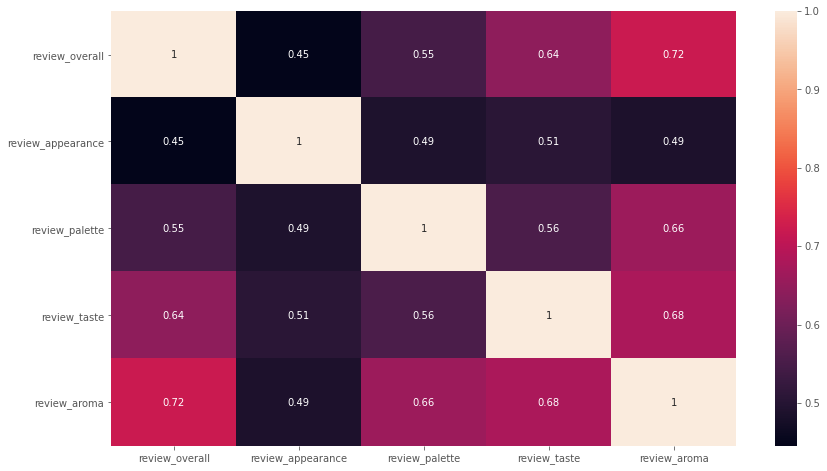

In [11]:
#GATHERING CORRELATION METRICS - Using SPEARMAN FOR ORDINAL VARIABLES
print("\nChecking Correlations (Spearman) between reviews\n")

spearman = df_reviews.corr(method='spearman')
#PLOTTING CORRELATION MATRIX TO FURTHER VISUALIZE THE FINDINGS
fig, ax = plt.subplots(figsize=(14,8))

sns.heatmap(spearman, xticklabels=spearman.columns, yticklabels=spearman.columns, annot=True,ax=ax)

In [12]:
# FUNCTION TO CALCULATE P-VALUES FOR Statistical Significance of Correlations

def Hypothesis_Testing_Corr(df,col):
    
    print("\nHypothesis Testing(99% Significance Level)\033[0m\n")
    
    flag=0
    for i in df.columns:
        if i!=col:
            if spearmanr(df[i], df[col])[1] <0.01:  #will give the p-value
                    print("\n\nStatistically Significant Correlation between",col,"and",i,":",spearmanr(df[i], df[col])[0],"\n")
                    
            else:
                print("\n\nCorrelation Value Not to be Trusted between",col,"and",i)
                flag+=1
    return(flag)

In [13]:
#TEST TO CHECK VALIDITY OF EXCLUSION OF REVIEW AROMA FROM AVERAGE REVIEW CALCULATION
avg_exclude='review_aroma'
flag = Hypothesis_Testing_Corr(df_reviews,avg_exclude)

#Proceed with Averaging if Every Correlation Identified is Statistically Significant
if flag==0:
    print("\n\n\033[1mProceeding with Averaging")
    print("\nExcluding",avg_exclude,"from the Averaging to not let this multicollinearity highjack our New Average Review Column\033[0m\n\n")

    df['review_avg'] = df.apply(lambda row: (row["review_overall"] + 
                                             row["review_appearance"]+ 
                                             row["review_palette"] + 
                                             row["review_taste"]) / 4, axis=1)


Hypothesis Testing(99% Significance Level)



Statistically Significant Correlation between review_aroma and review_overall : 0.7223225942356553 



Statistically Significant Correlation between review_aroma and review_appearance : 0.48678142115752104 



Statistically Significant Correlation between review_aroma and review_palette : 0.6611133956955126 



Statistically Significant Correlation between review_aroma and review_taste : 0.6799246983498227 



Proceeding with Averaging

Excluding review_aroma from the Averaging to not let this multicollinearity highjack our New Average Review Column




In [14]:
#SLICING THE DATAFRAME FOR AVERAGE REVIEWS >= 4.5 AND Classifying them as High Ratings
print("\nAggregating the Average Ratings between 4.5 to 5 as High Ratings")
df_high_ratings = df[df['review_avg']>=4.5]
df_high_ratings['review_avg']= 'High'


Aggregating the Average Ratings between 4.5 to 5 as High Ratings


<ipython-input-14-d3f33a32fe88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_ratings['review_avg']= 'High'


In [15]:
df_yearly = df_high_ratings.sort_values(by=['year_of_review']).reset_index(drop=True)  #Sorting Based on Year
del df_high_ratings #Saving Memory

## DATA VISUALIZATION FOR FINDING THE BEST YEAR FOR BEERS - BASED ON OVERALL REVIEW

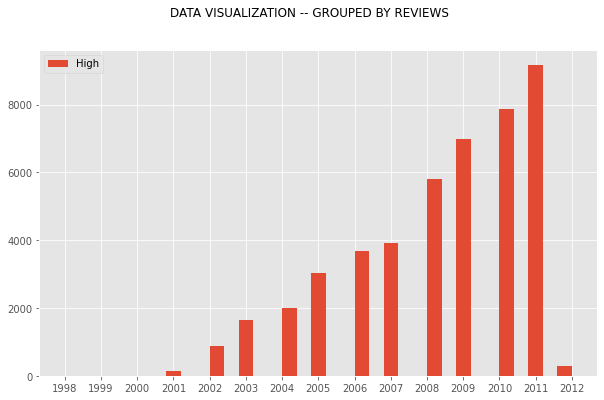


	Figure Shows 2011 comprising the Most Number of High Star Reviews





In [16]:
#Plotting Data Grouped by 
df_yearly.groupby(by=['review_avg'])['year_of_review'].hist(figsize=(10,6),bins=35,legend=True)
plt.suptitle("DATA VISUALIZATION -- GROUPED BY REVIEWS")
plt.show()

print("\n\tFigure Shows 2011 comprising the Most Number of High Star Reviews\n\n\n")

In [17]:
#Designing A Pivot Table for a Better Quantitative View of Ratings Distributions over the Years
pivot_high_ratings = df_yearly.pivot_table(index=['year_of_review'], columns='review_avg', aggfunc='size', fill_value=0).sort_values(by=['High'],ascending=False)
print("\n\n\033[1mPivot Table - TOP 5 YEARS WITH HIGH RATINGS\033[0m")
pivot_high_ratings[:5]



Pivot Table - TOP 5 YEARS WITH HIGH RATINGS


review_avg,High
year_of_review,
2011,9165
2010,7872
2009,6978
2008,5796
2007,3924


# 2. Which year did beers enjoy the highest ratings? 

In [18]:
print("\033[1m YEAR WITH HIGHEST RATINGS FOR BEERS IS:", pivot_high_ratings.index[0],"\033[0m")

 YEAR WITH HIGHEST RATINGS FOR BEERS IS: 2011 


# REVIEWS ANALYSIS - PT2 : Cross Verification of the Representability of the New Average Column

In [19]:
#Redifining DATAFRAME OF REVIEWS WITH THE NEWLY CREATED REVIEW AVG COLUMN
df_reviews= df[['review_overall','review_appearance','review_palette','review_taste','review_aroma','review_avg']]

<AxesSubplot:>

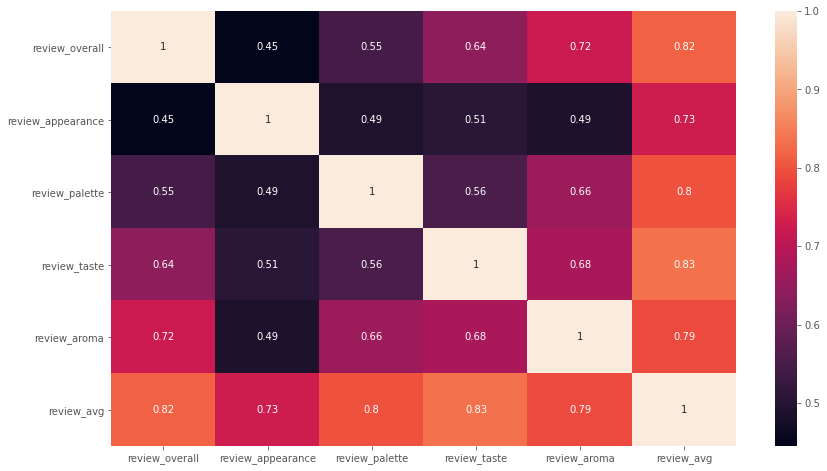

In [20]:
corr = df_reviews.corr(method='spearman')

#PLOTTING CORRELATION MATRIX
fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,ax=ax)

In [21]:
print("\n\033[1mCorrelation of New Average_Review Column with other Review Columns:\033[0m\n\n",corr.review_avg)


Correlation of New Average_Review Column with other Review Columns:

 review_overall       0.816753
review_appearance    0.726428
review_palette       0.800064
review_taste         0.834123
review_aroma         0.791564
review_avg           1.000000
Name: review_avg, dtype: float64


In [22]:
print("As clearly evident from Correlation Coefficients,",
      "\033[1mAverage Review Column is highly representative of the other reviews.",
      "\033[0m\n\nP.s.- Even the AROMA Review that wasn't even in the AVERAGE REVIEW Calculation\n\n")

As clearly evident from Correlation Coefficients, Average Review Column is highly representative of the other reviews. 

P.s.- Even the AROMA Review that wasn't even in the AVERAGE REVIEW Calculation




# 3. Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

In [23]:
print("Based on Previous Findings with Statistical Significance & Cross-Validation of the New Average Column's Representativity even after exlusion of REVIEW AROMA:\n")
print("MOST IMPORTANT/IMPACTFUL REVIEW COLUMN IS THE ONE WITH THE HIGHEST NUMBER OF AVERAGED CORRELATION COEFFICIENTS WITH OTHER COLUMNS:\n")

Based on Previous Findings with Statistical Significance & Cross-Validation of the New Average Column's Representativity even after exlusion of REVIEW AROMA:

MOST IMPORTANT/IMPACTFUL REVIEW COLUMN IS THE ONE WITH THE HIGHEST NUMBER OF AVERAGED CORRELATION COEFFICIENTS WITH OTHER COLUMNS:



In [24]:
def calc_avg_corr(df):

    val=0
    corr = df.corr(method='spearman')
    for i in corr.columns:
        if val < (corr[i].sum()) :    # CORRELATION COEFFS SUM METRIC
            og_review = i
            
    return og_review

In [25]:
sol_3 = calc_avg_corr(df_reviews.drop(columns='review_avg'))
print("THE MOST SIGNIFICANT/IMPORTANT REVIEW CATEGORY IS: \033[1m",sol_3.upper(),"\033[0m\n")

THE MOST SIGNIFICANT/IMPORTANT REVIEW CATEGORY IS:  REVIEW_AROMA 



# 4. If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

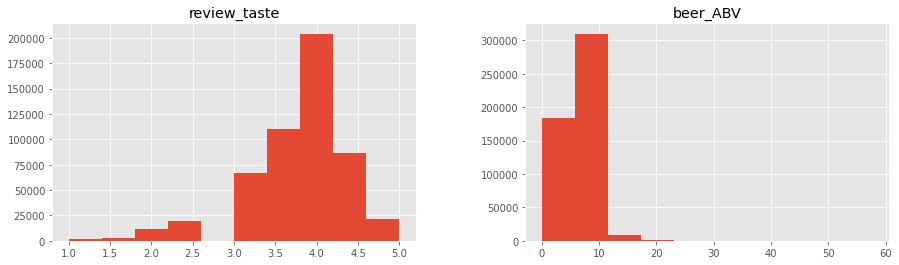


SETTING ABV CONTENT AND TASTE REVIEW THRESHOLD ABOVE 80 PERCENTILE:


ABV Content Threshold: 9.0

Taste Review Threshold 4.5


In [26]:
# Personal Choice of Recommendation would be to choose a Strong Beer with a Good Taste

df[['review_taste','beer_ABV']].hist(figsize=(15,4))
plt.show()

# Finding the ABV Content & Review Taste Values corresponding to 80th Percentile
abv_80_percentile = df['beer_ABV'].describe(percentiles =[0.8])['80%']
taste_80_percentile = df['review_taste'].describe(percentiles =[0.8])['80%']\

print('\nSETTING ABV CONTENT AND TASTE REVIEW THRESHOLD ABOVE 80 PERCENTILE:\n\n')
print("ABV Content Threshold:",abv_80_percentile)
print("\nTaste Review Threshold",taste_80_percentile)

In [27]:
# Filtering the Data with ABV >9.0 and Taste Review >4.5
v = df[(df['review_taste']>4.5) & (df['beer_ABV']>9.0)]['beer_beerId'].value_counts()

#Aggregating the Top 3 Beer Ids Satisfying the Threshold and having most reviews as compared to others satisfying thresholds
ids = np.array(v.index)[:3]
reviews = np.array(v.values)[:3]

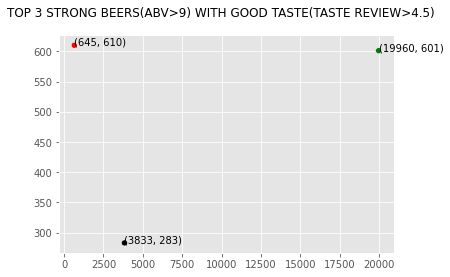

THE RECOMMENDED BEER IS THE BEER WITH BEER ID: [  645 19960  3833] 
Recommended Beer - Beer Style: [14190    Quadrupel (Quad)
14191    Quadrupel (Quad)
14192    Quadrupel (Quad)
14193    Quadrupel (Quad)
14194    Quadrupel (Quad)
               ...       
16432    Quadrupel (Quad)
16433    Quadrupel (Quad)
16434    Quadrupel (Quad)
16435    Quadrupel (Quad)
16436    Quadrupel (Quad)
Name: beer_style, Length: 2170, dtype: object, 16523    American Double / Imperial Stout
16524    American Double / Imperial Stout
16525    American Double / Imperial Stout
16526    American Double / Imperial Stout
16528    American Double / Imperial Stout
                       ...               
19163    American Double / Imperial Stout
19164    American Double / Imperial Stout
19165    American Double / Imperial Stout
19166    American Double / Imperial Stout
19167    American Double / Imperial Stout
Name: beer_style, Length: 1875, dtype: object, 4178    American Double / Imperial Stout
4183    American 

In [28]:
sns.scatterplot(x=ids,y=reviews,c=['r','g','black'])
plt.suptitle("TOP 3 STRONG BEERS(ABV>9) WITH GOOD TASTE(TASTE REVIEW>4.5)")
plt.figsize=(15,15)
#Putting Coordinates around the Scatter Points
for i_x, i_y in zip(ids,reviews):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))
    
plt.show()


rec_beer_style = []
rec_beer_style.append(df[df['beer_beerId']==ids[0]]['beer_style'][0])  #Getting the Beer Styles for the Recommended Beer
rec_beer_style.append(df[df['beer_beerId']==ids[1]]['beer_style'][0]) 
rec_beer_style.append(df[df['beer_beerId']==ids[2]]['beer_style'][0]) 

print("THE RECOMMENDED BEER IS THE BEER WITH BEER ID:",ids,"\nRecommended Beer - Beer Style:",rec_beer_style)

# 5. Which Beer style seems to be the favorite based on reviews written by users? 

# # UnSupervised Sentiment Analysis - Text Reviews

In [33]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace =True)

In [37]:
def plot_review_length(reviews,title):

    length_reviews=[]
    for i in reviews:
        length_reviews.append(len(i.split()))

    plt.hist(length_reviews,bins=30)
    plt.suptitle(title)
    plt.show()

In [38]:
thresh = df['review_avg'].describe(percentiles =[0.5])['50%']
print("\t50TH Percentile Average Review Value:",thresh)

# TREATING AVG REVIEWS BELOW THRESHOLD AS BAD AND ABOVE Threshold AS GOOD
df['review_avg_binary'] = np.where(df['review_avg']>thresh, 'Good', 'Bad')

# CREATING A NEW DATAFRAME WITH ONLY RELEVANT NEEDED COLUMNS
df_text = df[['beer_beerId','beer_style','review_profileName','review_text','review_avg_binary','review_overall']]

	50TH Percentile Average Review Value: 3.875


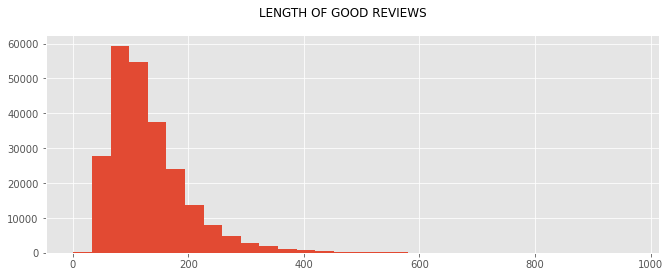

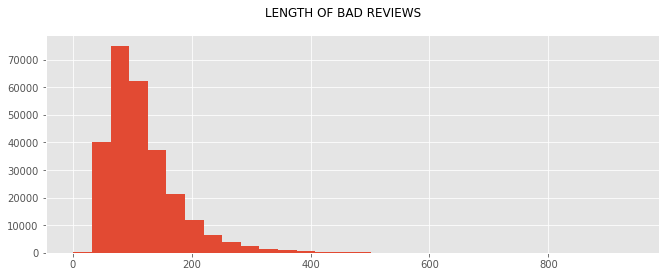


	 NO CLEAR DISTINCTION BETWEEN GOOD AND BAD REVIEWS BASED ON LENGTH



In [39]:
plot_review_length(df_text[df_text['review_avg_binary']=='Good']['review_text'].values,"LENGTH OF GOOD REVIEWS")
plot_review_length(df_text[df_text['review_avg_binary']=='Bad']['review_text'].values, "LENGTH OF BAD REVIEWS")
print( "\n\t NO CLEAR DISTINCTION BETWEEN GOOD AND BAD REVIEWS BASED ON LENGTH\n" )

# Function to Pre-process Review_Text Column

In [40]:
lemmatizer = WordNetLemmatizer() 

def preproc(line):   
    
    line = str.strip(line) #Strip newline
    line = line.lower()
    
    #Replace punctuations with space
    line = re.sub(r"[-()\"#/@;:<>+=_|{}.?,]", " ", line)
    
    #Replace non word character by space
    line = re.sub(r"\W", " ", line)
    
    short_stringpunc = list(string.punctuation)
    short_stringpunc.remove('!')
    stoplist = stopwords.words('english') + short_stringpunc #Creating Custom STOPLIST
    
    token=[lemmatizer.lemmatize(word) for word in word_tokenize(line) if word.lower() not in stoplist and not word.isdigit()]
    
    
    strline =' '.join(token)
    strline = re.sub(r" +"," ", strline)  #removing extra spaces
    return strline

In [41]:
df_text.reset_index(drop=True,inplace=True)
df_text['review_text_new'] = list(map(preproc,df_text['review_text']))

<ipython-input-41-3c3a63c456c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['review_text_new'] = list(map(preproc,df_text['review_text']))


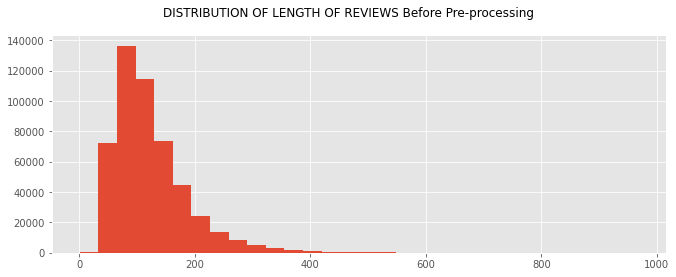

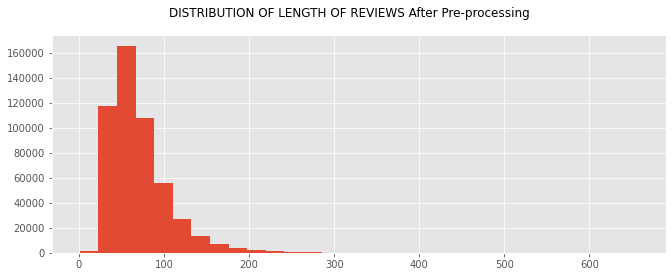

Clearly, Pre-processing Steps have significantly decreased the Length of Reviews


In [42]:
plot_review_length(df_text.review_text,"DISTRIBUTION OF LENGTH OF REVIEWS Before Pre-processing")
plot_review_length(df_text.review_text_new.values,"DISTRIBUTION OF LENGTH OF REVIEWS After Pre-processing")


print("Clearly, Pre-processing Steps have significantly decreased the Length of Reviews")

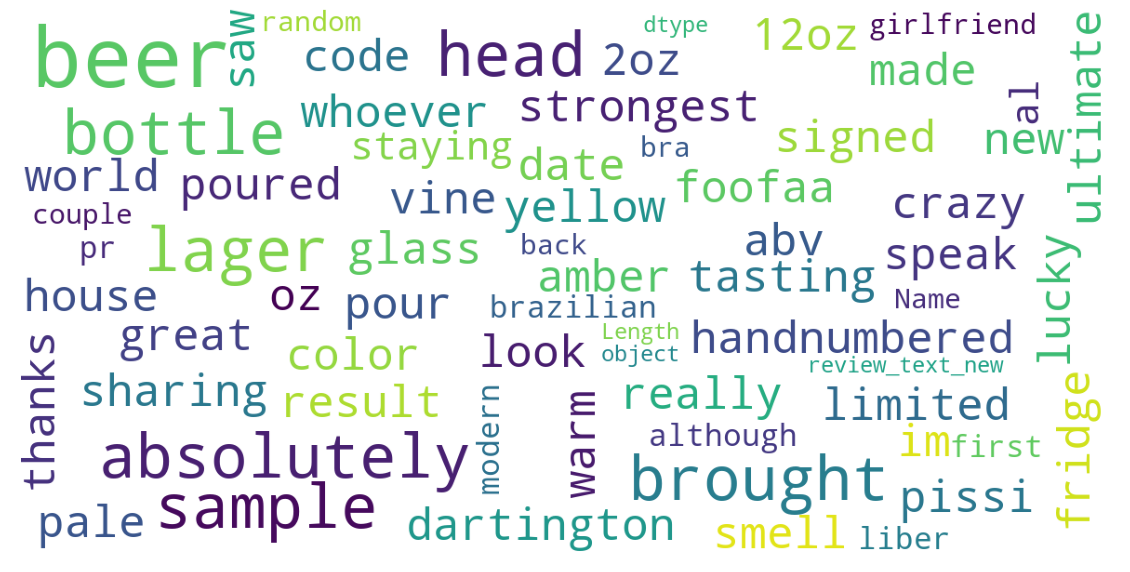

In [43]:
# wordcloud function

from wordcloud import WordCloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 250,
        max_font_size = 30, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 10)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df_text["review_text_new"])

## 1) Use Compound Scoring from VADER Sentiment/Polarity Analyzer Col to determine Favourite Beer Styles

## 2) Find Counts of Mention of Beer Styles in Reviews -GOOD & BAD



## Note:- Bad means relatively bad.  A personal classification choice of good and bad based on reviews distribution which is not to be taken in absolute sense

In [44]:
# Implementing VADER-LEXICON BASED Sentiment Analysis
analyser = SentimentIntensityAnalyzer()

#Define Function which returns Compound Polarity Score of Sentences
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return(score['compound'])
    
#dummy sentence polarity to check
dummy = "woah amazing strength of beer. i think it is completely above average beer"
print(dummy,sentiment_analyzer_scores(dummy))

woah amazing strength of beer. i think it is completely above average beer 0.7906


In [45]:
#CREATING A NEW NET_POS REVIEW COLUMN TO GET SENTIMENT ANALYSIS COMPOUND SCORE
df_text['net_pos_review'] = list(map(sentiment_analyzer_scores,df_text['review_text_new']))

<ipython-input-45-057a82d777cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['net_pos_review'] = list(map(sentiment_analyzer_scores,df_text['review_text_new']))


In [46]:
# DROPPING BEER STYLES WITH VERY LESS REVIEWS
beer_style_threshold= df_text['beer_style'].value_counts().describe()['50%']
df_text= df_text.groupby("beer_style").filter(lambda x: len(x) >= beer_style_threshold)

In [47]:
# ANALYZING REVIEWS DISTRIBUTION BASED ON COMPOUND POLARITY SCORE
print(df_text['net_pos_review'].describe(percentiles=[0.5,0.8]))

#Since Polarity is Normally Distributed, Taking the Median as Threshold
polarity_threshold = df_text['net_pos_review'].describe(percentiles=[0.5,0.8])['50%']  

count    439675.000000
mean          0.826118
std           0.311254
min          -0.993000
50%           0.942300
80%           0.979400
max           0.999900
Name: net_pos_review, dtype: float64


In [48]:
# FINDING NORMALIZED SUM OF NET POSITIVE REVIEWS FOR BEER STYLES TO DETERMINE BEST BEER STYLE
g_style = df_text.groupby(by=['beer_style'])

norm_scoring = (g_style['net_pos_review'].sum()/g_style['net_pos_review'].count()).sort_values(ascending=False)
norm_index = norm_scoring.index
norm_values = norm_scoring.values

In [49]:
print ("The Best Beer Style Based on Written Reviews Polarity is : ",norm_index[0])

The Best Beer Style Based on Written Reviews Polarity is :  Quadrupel (Quad)


PLOTTING BAR CHART FOR THE TOP 3 BEER STYLES BASED ON REVIEWS POLARITY



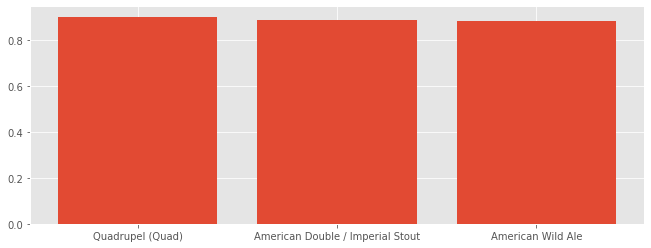



THE MOST LOVED / FAVORITE BEER STYLE IS: QUADRUPEL (QUAD)


In [50]:
print("PLOTTING BAR CHART FOR THE TOP 3 BEER STYLES BASED ON REVIEWS POLARITY\n")

plt.bar(norm_index[:3],height=norm_values[:3])
plt.show()

print("\n\nTHE MOST LOVED / FAVORITE BEER STYLE IS:",norm_index[0].upper())   #PRINTING THE FAVORITE BEER 

# 6.	How does written review compare to overall review score for the beer styles?

## Overall REVIEW ANALYSIS FOR BEER STYLE

In [51]:
# Dropping Rows with even a single blank value (Earlier the Review text blank rows were not removed)
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

## Since the Reviews were already De-duplicated
## Proceeding with the analysis of number and type of reivews written for different beer styles

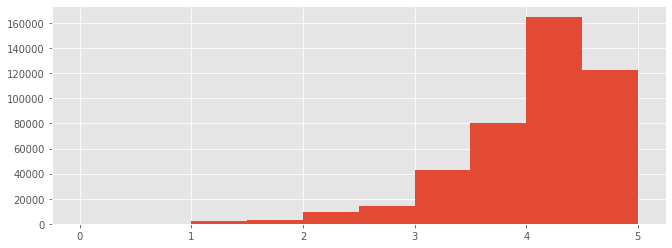

	50TH Percentile Average Review Value: 4.0


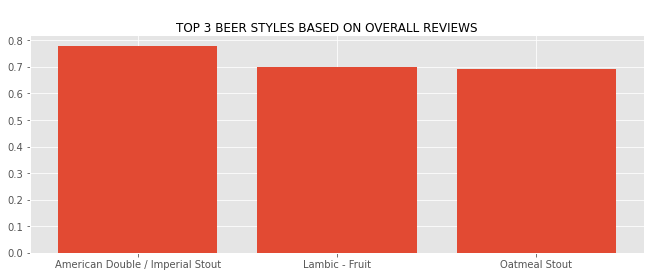


	BASED ON OVERALL REVIEWS FAVORITE BEER STYLE IN TERMS OF GOOD REVIEWS IS: AMERICAN DOUBLE / IMPERIAL STOUT


In [52]:
#AVERAGE_REVIEW ANALYSIS TO CONVERT INTO BINARY CLASS
df_text['review_overall'].hist(bins=10)
plt.show()


review_50_per = df_text['review_overall'].describe(percentiles =[0.5])['50%']
print("\t50TH Percentile Average Review Value:",review_50_per)

# TREATING AVG REVIEWS BELOW Threshold AS BAD AND ABOVE Threshold AS GOOD
df_text['review_overall_binary'] = np.where(df_text['review_overall']>review_50_per, 'Good', 'Bad')

good = df_text[df_text['review_overall_binary']=='Good']['beer_style'].value_counts()
bad = df_text[df_text['review_overall_binary']=='Bad']['beer_style'].value_counts()


dict_style = dict()
for i in good.index:
    beer_style_reviews = good[i] / bad[i]   #normalizing the scores
    dict_style[i]=beer_style_reviews


#Sorting the Dictionary in Descending Order
dict_style={k: v for k, v in sorted(dict_style.items(), key=lambda item: item[1],reverse=True)}

plt.bar(range(3), list(dict_style.values())[:3],align='center')
plt.xticks(range(3), list(dict_style.keys())[:3])
plt.suptitle("\nTOP 3 BEER STYLES BASED ON OVERALL REVIEWS\n")
plt.rcParams["figure.figsize"] = [12,5]
plt.show()

print("\n\tBASED ON OVERALL REVIEWS FAVORITE BEER STYLE IN TERMS OF GOOD REVIEWS IS:",list(dict_style.keys())[0].upper())

In [53]:
del df,df_reviews,df_yearly,norm_index,norm_values,norm_scoring #saving memory

# VECTORIZING SENTENCES WORD2VEC FOR T-SNE Visualization
# To Identify if there are well defined Clusters as per the Well Defined Ratings Segregation

In [ ]:
df_text['tokenized_text'] = df_text['review_text_new'].apply(word_tokenize)
input_word2vec = list(df_text.tokenized_text.values)

In [55]:
from gensim.models import Word2Vec

#WORD2VEC MODEL TRAINING ON DATASET - Embedding - 100-dimensional
model = Word2Vec(input_word2vec, size=100, window=3, min_count=1, workers=5) 

In [56]:
model.save(os.path.join(directory,"word2vec_model_1.0"))

print("\nMost Frequent 15 Words\n",model.wv.index2entity[:15])

#AVERAGING THE WORD EMBEDDINGS TO GET SENTENCE EMBEDDINGS
def avg_word_emb(df,col):
    
    l=[]
    for words in df[col]:
        words = [word for word in words if word in model.wv.vocab and len(word)>2]
        if len(words)>=1:
            l.append(np.mean(model[words], axis=0))
        else:
            print(words)
       
    
    return (l)

l = avg_word_emb(df_text,'tokenized_text')


Most Frequent 15 Words
 ['beer', 'head', 'hop', 'taste', 'malt', 'nice', 'flavor', 'good', 'like', 'light', 'sweet', 'smell', 'one', 'aroma', 'bit']


<ipython-input-56-0ddd5295b2bc>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  l.append(np.mean(model[words], axis=0))


In [ ]:
from sklearn.manifold import TSNE

# The default of 1,000 iterations gives fine results, but I'm training for longer just to eke
# out some marginal improvements. NB: This takes almost an hour!
tsne = TSNE(random_state=144,n_iter=300, metric="cosine",verbose=1)

tsne_results = tsne.fit_transform(l)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 439675 samples in 0.048s...


In [ ]:
df_text['tsne-2d-one'] = tsne_results[:,0]
df_text['tsne-2d-two'] = tsne_results[:,1]


plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1]
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)